<a href="https://colab.research.google.com/github/Jaiharish-passion07/Types-Of-Trnasformation/blob/main/Clasification_Airline_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<u>Importing all Necessary Libraries</u>

In [97]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import time
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [98]:
#All Machine learning Modules are imported here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#<u>AirLines Data Frame</u>

In [99]:
#Loading the data
df=pd.read_excel('/content/drive/MyDrive/Classification Project/data_airline_reviews.xlsx')

In [100]:
#Shape of data
df.shape

(131895, 17)

In [101]:
#Dropping Null rows
df_clean=df.loc[~df.isnull().all(axis=1),:]

In [102]:
#Shape of Cleaned data
df_clean.shape

(65947, 17)

In [103]:
#Head of Data
df_clean.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


##Statistical Information

In [104]:
#Statistical information about data
df_clean.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##Data types of each column


In [105]:
#Data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65947 entries, 1 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64(

## Droping Unnecessary columns

In [106]:
#Remove Unwanted Column
airline_df=df_clean.drop(['airline','author','review_date','route','date_flown','customer_review'],axis = 1)
airline_df.head()

,overall,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,7.0,NaN,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,2.0,NaN,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,3.0,NaN,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,10.0,A330,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,1.0,NaN,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no




1.   Dropping __Airline&Author__ Column from the Data.Because those data does not related to my problem usecase.
2.   Dropping __Review_Date,Route,date_flown__ Column from the Data.It does not need for building a model.
3.   Dropping  __Customer_review__ from the Data. It is related to overall review from my datasets. 



##Cleaning Data by Removal of Null values

<u>__Numerical Data Imputation__</u>

1. __Quantile-1 value imputation__ for overall,seat_comfort,cabin_service and value_for_money column.
2. __Medain Imputation__ for food_bev,entertainment and ground_service column
3. Removing __Aircraft Column__,Because it consists of __70% of null values__ in my entire data set.

In [107]:
#Percentage of null values 
airline_df.isnull().sum()/len(airline_df)*100

overall             2.926593
aircraft           70.100232
traveller_type     39.716742
cabin               4.009280
seat_comfort        7.985200
cabin_service       7.933644
food_bev           20.226849
entertainment      32.987096
ground_service     40.318741
value_for_money     2.990280
recommended         2.285168
dtype: float64

In [108]:
#Splitting the Numeric column

#Col_1 datas have low percentage of null values
col_1=['overall','seat_comfort','cabin_service','value_for_money']
#Col_2 datas have high percentage of null values
col_2=['food_bev','entertainment','ground_service']

1.  The Missing type of data belongs to __Missing Data Not At Random(MNAR)__
2.  Based on an __assumption as well as a business understanding__. Passengers may not prefer to tell the ratings. Because a traveller might have a __bad travel experience__ and does not want to share their opinion.

In [109]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [110]:
#Looping the null value column
for col in col_1:
  impute_by_q1_values(airline_df,col)

1.  We imputed null values by __Quantile-1__ value for __low percentage of null value column__, which is the least rating of each column.
2.  Whereas it __does not affect__ the __Original variance__ and __distribution__ of data.Because it only consists of >7% of null values.

In [111]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [112]:
#Looping the null value column
for col in col_2:
  median_imputation(airline_df,col)

1. We imputed null values by __Median Imputaion__ for __high percentage of null value column__. Because it consits of more than 7% of null values in each column.
2. This is done to __preserve the original distribution and variance__ of my data.

In [113]:
#Remove Aircraft column
airline_df.drop('aircraft',axis=1,inplace=True)

<u>__Categorical Data Imputation__</u>

1. __Mode Imputation__ for __Cabin__ Column.
2. Traveller type column is imputed using __Forward fill__ method.  

In [114]:
#Remove recommended null value row
airline_df.dropna(subset=['recommended'],inplace=True)

In [115]:
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

In [116]:
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

###Cleaning Data by Outliers Detection and Removal

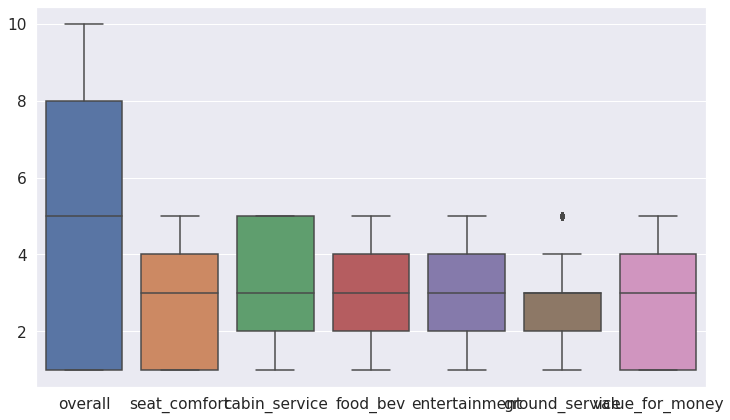

In [117]:
plt.figure(figsize=(12,7))
sns.boxplot(data=airline_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']])

<u>From above plot</u>
1. There is __no outlier__ present for each column.

In [118]:
#cleaned data
airline_df.head()

,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


# <u>Exploratory Data Analysis</u>

1)Which Traveller_type has more ratings?<br>
2)Which type of Cabin has more recommendation?<br>
3)Is it Solo Leisure worth for Money?<br>
4)In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?

__1)Which Traveller_type has more ratings?__


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


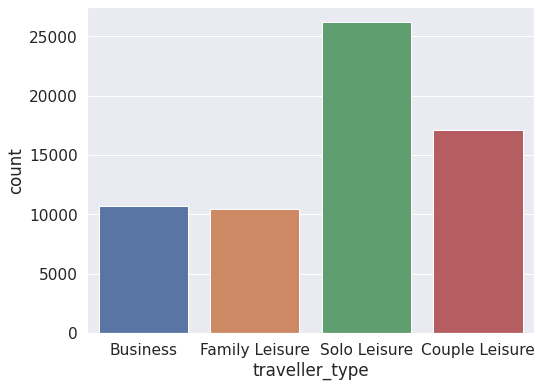

In [119]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(airline_df['traveller_type'])

__2)Which type of Cabin has more recommendation?__

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


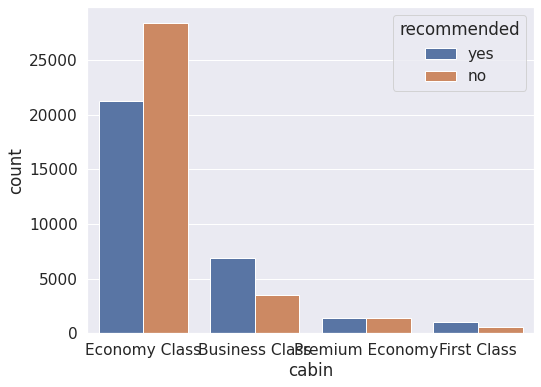

In [120]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(airline_df['cabin'],hue=airline_df['recommended'])

__3)Is it Solo Leisure worth for Money?__

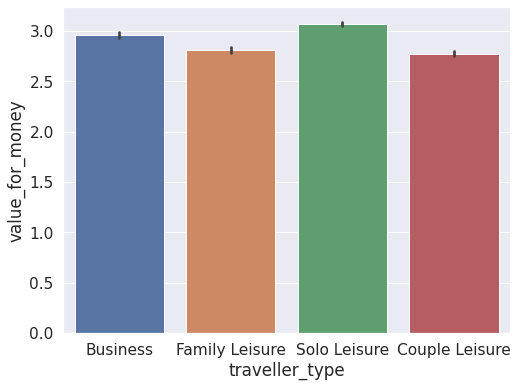

In [121]:
#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x=airline_df['traveller_type'],y=airline_df['value_for_money'])

__4)In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?__

In [122]:
#performing the grouphby method 
eda_4=airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()

In [123]:
eda_4

,cabin,food_bev,entertainment
0,Business Class,3.484893,3.299729
1,Economy Class,2.794708,2.807445
2,First Class,3.383951,3.250000
3,Premium Economy,2.907824,3.011075


##Correlation plot

In [124]:
#mapping the target feature with numerical data
airline_df['recommended']=airline_df['recommended'].map({'yes':1,'no':0})

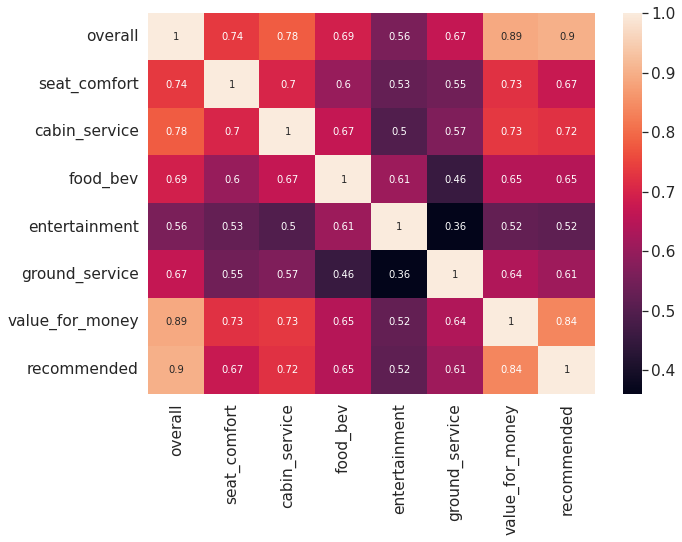

In [125]:
#setting the figure size and plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(airline_df.corr(),annot=True)

### Removing Multicollinearity features

In [126]:
#Creating a function to remove multicollinear
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [127]:
calc_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,10.951034
1,cabin_service,13.238540
2,food_bev,12.842290
3,entertainment,9.511114
4,ground_service,8.115697


__Overall column__ and __Value_for_money__ got removed due to __multicollinearity__  between them.

In [128]:
#Dropping Multicollinearity features
airline_df.drop(['value_for_money','overall'],axis=1,inplace=True)
airline_df.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,1
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,0
5,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,0
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,1
9,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,0


#<u>Model Building</u>

####___Encoding Techniques for Categorical Data___

In [130]:
#Creating a copy of our dataframe
data=airline_df.copy()

In [131]:
#Performing One hot encoding
traveller_type =pd.get_dummies(data['traveller_type'],drop_first=True)
data=pd.concat([data,traveller_type],axis='columns')
cabin =pd.get_dummies(data['cabin'],drop_first=True)
data=pd.concat([data,cabin],axis='columns')
data.drop(['traveller_type','cabin'],axis=1,inplace=True)

In [132]:
data.head()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended,Couple Leisure,Family Leisure,Solo Leisure,Economy Class,First Class,Premium Economy
1,4.0,5.0,4.0,4.0,2.0,1,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,0,0,1,0,1,0,0
5,1.0,4.0,1.0,3.0,1.0,0,0,0,0,1,0,0
7,4.0,5.0,5.0,5.0,5.0,1,0,0,1,1,0,0
9,1.0,1.0,1.0,1.0,1.0,0,0,0,1,1,0,0


Setting __X__ and __Y__ data

In [133]:
X=data.drop('recommended',axis=1)
Y=data['recommended']

In [134]:
print("The Percentage of No labels of Target Variable is",np.round(Y.value_counts()[0]/len(Y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(Y.value_counts()[1]/len(Y)*100))

The Percentage of No labels of Target Variable is 53.0
The Percentage of Yes labels of Target Variable is 47.0


The __Percentage of both labels('yes','no)__ is approximately equal. So no need of __Handling Class Imbalance__ technique.

###___Splitting Train and Test Data___

In [135]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.2, random_state = 42) 

In [136]:
#shape of x_train and x_test data
print(X_train.shape)
print(X_test.shape)

(51552, 11)
(12888, 11)


In [137]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(51552,)
(12888,)


### ___<u>Model-1:Fitting Logistic Regression</u>___

In [138]:
#Initializing Logistic Model object

logistic_regression_clf= LogisticRegression(fit_intercept=True, max_iter=10000)
#Taining a model with x and y
logistic_regression_clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [139]:
logistic_regression_clf.coef_

array([[ 0.43555283,  0.7154382 ,  0.70962743,  0.39416488,  1.115802  ,
        -0.0498211 , -0.08240856,  0.16514225,  0.06614861, -0.1806934 ,
        -0.37377639]])

In [140]:
logistic_regression_clf.intercept_

array([-10.07663738])

###___<u>Model-2:Fitting Decision Tree Classifer</u>___

In [141]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Taining a model with x and y
tree_classify.fit(X_train,y_train)

DecisionTreeClassifier()

In [142]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(X_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(X_test,y_test))

Training Accuracy of Decision Tree Model is 0.9325341402855369
Testing Accuracy of Decision Tree Model is 0.8910614525139665


Here my model is __Overfitted__. So __Hyperparameter tuning__ is done to __prune a Decision tree__ to preserve __Generalized Model__.

__Hyperparameter Tuning For Decision Tree__

In [143]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [144]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [145]:
#calling an best params
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [146]:
#calling an best score
tree_cv.best_score_

0.8951738206567225

__Fitting the Best estimators After Hyperparameter tuning for Decision tree__

In [147]:
#Fitting an best parameters to Decision tree Model
final_tree_after_hyper_param_tune=tree_cv.best_estimator_
final_tree_after_hyper_param_tune.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5)

###___Ensemble Techniques___

###___<u>Model-3:Fitting Random Forest</u>___

__Hyperparameter Tuning For Random Forest__

In [148]:
#Starting time for Execution
start_time = time.time()

#Initializing Random Forest Model object
rand_forest_class = RandomForestClassifier()

#setting the parameters and scoring metric
scoring_rf=['f1','accuracy','roc_auc']
grid_values = {'n_estimators':[60, 80,100], 'max_depth':[5, 7],"min_samples_split":[3,5],"min_samples_leaf":[2,3]}

#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
rand_forest_class = GridSearchCV(estimator=rand_forest_class, param_grid = grid_values, scoring = scoring_rf, cv=3,refit='roc_auc')

#Fitting x and y to gridsearchcv model using an estimator Random Forest Classifier
rand_forest_class.fit(X_train, y_train)

#Ending time for Execution
elapsed_time_secs = time.time() - start_time

msg = "Execution time for performing Hyperparameter tuning on Random Forest: %s Minutes " % timedelta(seconds=round(elapsed_time_secs))
print(msg)   

Execution time for performing Hyperparameter tuning on Random Forest: 0:01:43 Minutes 


In [149]:
#calling and best parameter
rand_forest_class.best_params_

{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

__Fitting the Best estimators After Hyperparameter tuning for Random Forest__

In [150]:
#Fitting an best parameters to Random Forest Classifier Model
random_forest_after_hyper_param_tune=rand_forest_class.best_estimator_
random_forest_after_hyper_param_tune.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5)

###___<u>Model-4:Fitting Gradient Boosting Techniques</u>___

__Hyperparameter Tuning For Gradient Boosting__

In [151]:
#Starting time for Execution
start_time = time.time()

#Initializing Gradient Boosting Model object
grad_boost_class = GradientBoostingClassifier()

#setting the parameters and scoring metric
scoring_rf=['f1','accuracy','roc_auc']
grid_values = {'n_estimators':[80,100], 'max_depth':[5, 7],"min_samples_split":[3,5],"min_samples_leaf":[2,3]}

#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
grad_boost_class = GridSearchCV(estimator=grad_boost_class, param_grid = grid_values, scoring = scoring_rf, cv=3,refit='roc_auc')

#Fitting x and y to gridsearchcv model using an estimator Gradient Boosting
grad_boost_class.fit(X_train, y_train)

#Ending time for Execution
elapsed_time_secs = time.time() - start_time

msg = "Execution time for performing Hyperparameter tuning on Gradient Boosting: %s Minutes " % timedelta(seconds=round(elapsed_time_secs))
print(msg)   

Execution time for performing Hyperparameter tuning on Gradient Boosting: 0:03:04 Minutes 


In [152]:
#calling and best parameters
grad_boost_class.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 80}

__Fitting the Best estimators After Hyperparameter tuning for Gradient Boosting Model__

In [153]:
#Fitting an best parameters to Gradient Boosting model
grad_boost_after_hyperparm=grad_boost_class.best_estimator_
grad_boost_after_hyperparm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                           n_estimators=80)

###__Accuracy Metrics for All Fitted Model__

In [154]:
#Creating a function to return all Models Accuracy Score 

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)
  
  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precsion scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [155]:
models=[logistic_regression_clf,final_tree_after_hyper_param_tune,random_forest_after_hyper_param_tune,grad_boost_after_hyperparm]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','Gradient Boosting Model After Hyperparameter Tuning']

In [156]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],X_train,X_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.894204    0.895950
1  Precsion_Score     0.895205    0.892142
2    Recall_Score     0.880908    0.883372
3   Roc_Auc_Score     0.893597    0.895142

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.898937    0.899209
1  Precsion_Score     0.920707    0.915827
2    Recall_Score     0.861962    0.862879
3   Roc_Auc_Score     0.897250    0.896877

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.900916    0.901304
1  Precsion_Score     0.923368    0.920370
2    Recall_Score     0.863551    0.862712
3   Roc_Auc_Score     0.899211    0.898826

-*-*--*-*--*-*-Gradient Boosting Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Te

###Confusion Matrix for Training Data and Testing Data

In [157]:
from sklearn.metrics import confusion_matrix
name1=['Logistic Regression Confusion Matrix','Decision Tree Model Confusion Matrix','Random Forest Model Confusion Matrix','Gradient Boosting Model Confusion Matrix']

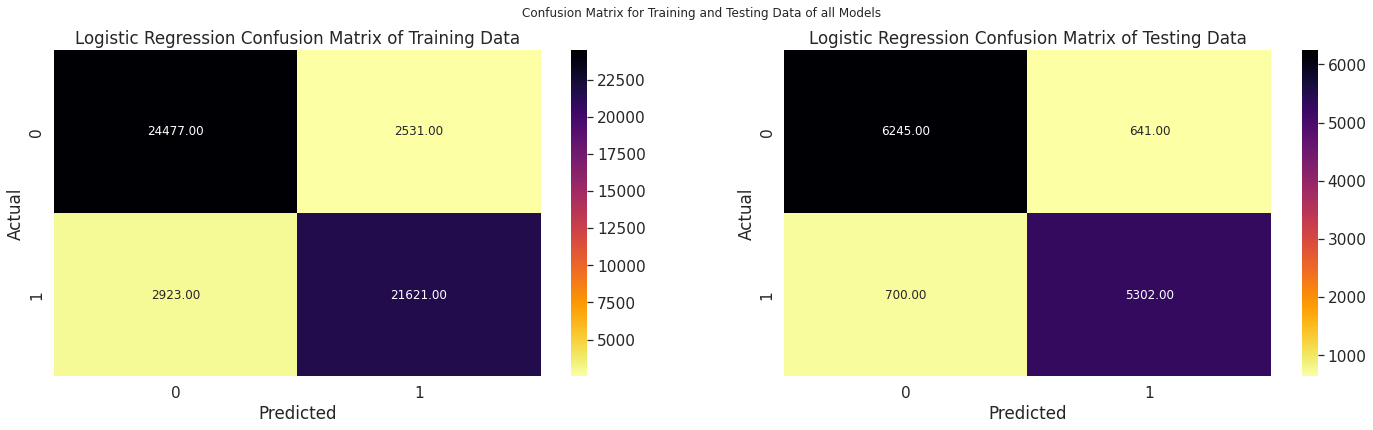

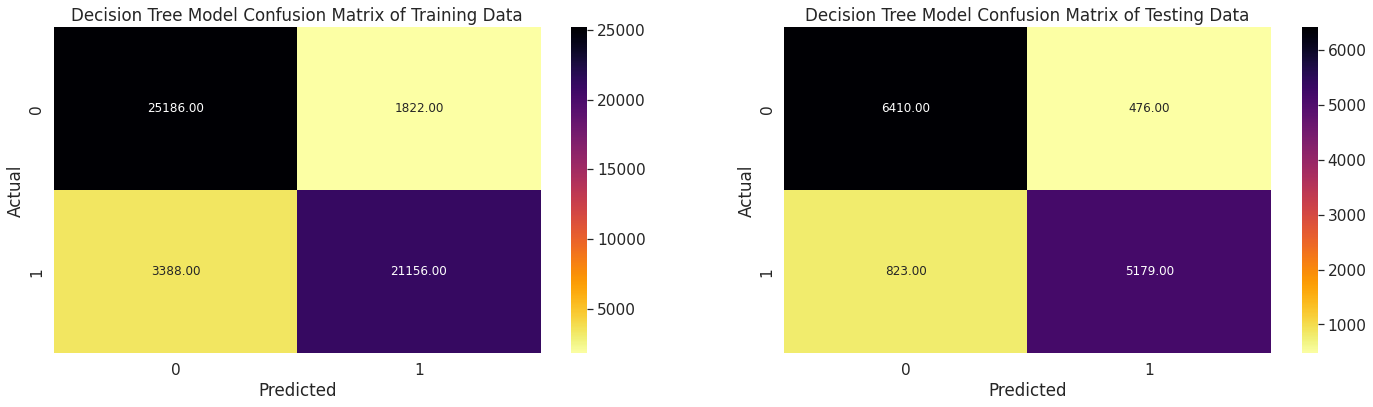

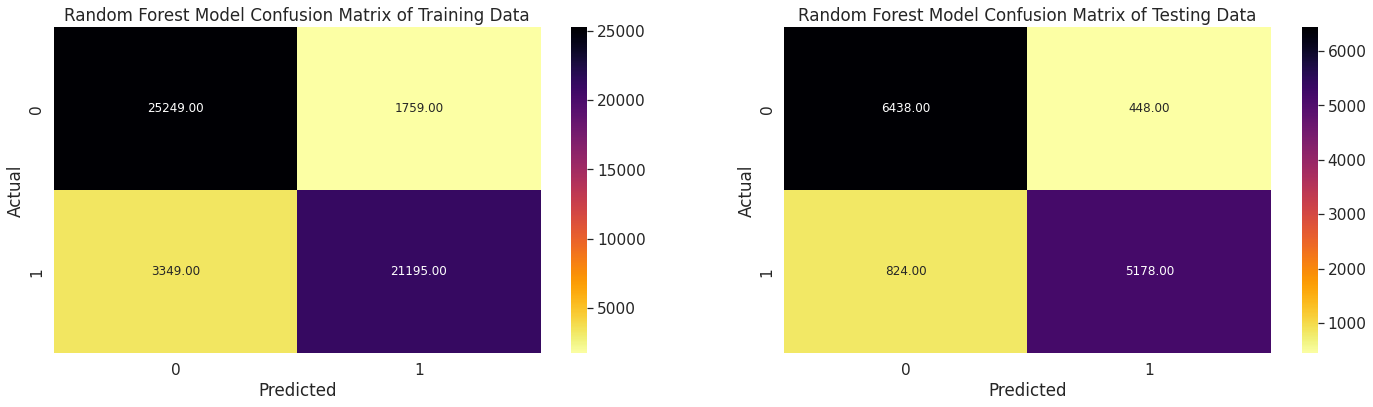

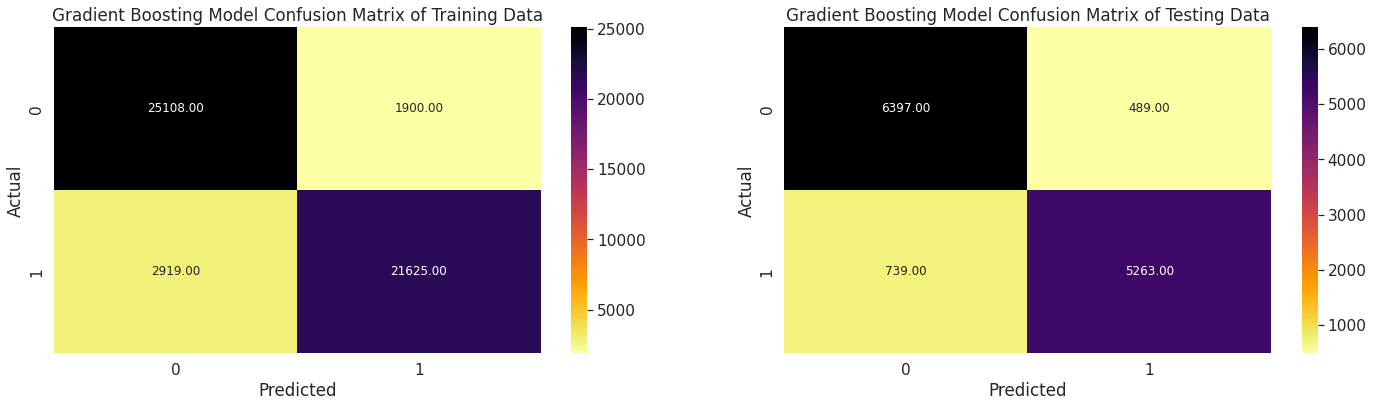

In [158]:
#Setting subplots
for model_ in range(len(models)):

  fig, ax =plt.subplots(1,2,figsize=(24,6))
  if model_==0:
    fig.suptitle('Confusion Matrix for Training and Testing Data of all Models')
  else:pass
  y_pred_train = models[model_].predict(X_train)
  y_pred_test = models[model_].predict(X_test)

  dat1_train= confusion_matrix(y_train, y_pred_train)
  dat2_test = confusion_matrix(y_test, y_pred_test)

  df_cm1 = pd.DataFrame(dat1_train, columns=np.unique(y_train), index = np.unique(y_train))
  df_cm2 = pd.DataFrame(dat2_test, columns=np.unique(y_test), index = np.unique(y_test))

  df_cm1.index.name = 'Actual'
  df_cm1.columns.name = 'Predicted'
  #sns.set(font_scale=1.4)#for label size
  df_cm2.index.name = 'Actual'
  df_cm2.columns.name = 'Predicted'

  a=sns.heatmap(df_cm1, cmap="inferno_r", annot=True,annot_kws={"size": 12},fmt='.2f',ax=ax[0])
  a.set(title=name1[model_]+' of Training Data')
  print("")
  b=sns.heatmap(df_cm2, cmap="inferno_r", annot=True,annot_kws={"size": 12},fmt='.2f',ax=ax[1])
  b.set(title=name1[model_]+' of Testing Data')
  print("")
  fig.show()

##Interpretation of All Fitted Models

In [90]:
!pip install lime

     |████████████████████████████████| 275 kB 4.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=1e5f343020f654880976d2c188d0b8e17f837c12b0e368852ae83cf3eaa14fa6
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [91]:
# LIME SECTION
import lime
import lime.lime_tabular
from __future__ import print_function

In [ ]:
# Drop unwanted columns
train_df = train_df.drop(['Trip_ID','Cancellation_Last_1Month','Confidence_Life_Style_Index','Gender','Life_Style_Index','Var1','Var2'],axis=1)
#### Extract the label column
train_target = np.ravel(np.array(train_df['Surge_Pricing_Type'].values))
train_df = train_df.drop(['Surge_Pricing_Type'],axis=1)

In [92]:
predict_fn_logreg = lambda x: models[0].predict_proba(x)
predict_fn_tree= lambda x: models[1].predict_proba(x)
predict_fn_rf = lambda x: models[2].predict_proba(x)
predict_fn_gb = lambda x: models[3].predict_proba(x)

In [93]:
# Extract features
float_columns=[]
cat_columns=[]
int_columns=[]

In [96]:
airline_df['recommended']=airline_df['recommended'].map({'yes':1,'no':0})
airline_df.head()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended,Couple Leisure,Family Leisure,Solo Leisure,Economy Class,First Class,Premium Economy
1,4.0,5.0,4.0,4.0,2.0,1,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,0,0,1,0,1,0,0
5,1.0,4.0,1.0,3.0,1.0,0,0,0,0,1,0,0
7,4.0,5.0,5.0,5.0,5.0,1,0,0,1,1,0,0
9,1.0,1.0,1.0,1.0,1.0,0,0,0,1,1,0,0


In [ ]:
airline_df.info()

In [ ]:
# Putting features into respective float, cat , int list.
for i in airline_df.columns:
    if airline_df[i].dtype == 'float' : 
        float_columns.append(i)
    elif airline_df[i].dtype == 'int64':
        int_columns.append(i)
    elif airline_df[i].dtype == 'object':
        cat_columns.append(i)

In [ ]:
# Line-up the feature names
feature_names_cat = list(train_cat_features_ver2)
feature_names_float = list(train_float_features)
feature_names_int = list(train_int_features)

feature_names = sum([feature_names_cat, feature_names_float, feature_names_int], [])
print(feature_names)

In [ ]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train ,feature_names = feature_names,class_names=['1','2','3'],
                                                   categorical_features=cat_columns, 
                                                   categorical_names=feature_names_cat, kernel_width=3)


In [ ]:
# Get the explanation for RandomForest
exp = explainer.explain_instance(X_validation[observation_1], predict_fn_rf, num_features=6)
exp.show_in_notebook(show_all=False)

In [ ]:
# Get the explanation for XGBoost
exp = explainer.explain_instance(X_validation[observation_1], predict_fn_xgb, num_features=6)
exp.show_in_notebook(show_all=False)

In [ ]:
!pip install shap